In [10]:
# Importing packages
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score,plot_confusion_matrix,matthews_corrcoef
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(88)

In [32]:
train = pd.read_csv("train_balanced.csv")
train_x = train.iloc[:,0:14].values
train_y = train.iloc[:,-1].values

In [ ]:
#GridSearch for Parameters of Interest
params = {"hidden_layer_sizes":[(5,5),(10,10),(15,15)],
            "learning_rate_init" : [0.005,0.01,0.015],
            'beta_1':[0.7,0.8,0.9],
             "beta_2":[0.79,0.89,0.99],
             "max_iter":[300,400,500]}

f1 = make_scorer(f1_score , average='weighted')
acc = make_scorer(balanced_accuracy_score)

model = MLPClassifier(activation="logistic",solver="adam",learning_rate="constant",learning_rate_init=0.001,beta_1=0.0,beta_2=0.000,early_stopping=True,validation_fraction=True)

In [ ]:
search =GridSearchCV(model,params,scoring=["f1","accuracy"],n_jobs=1,refit="f1",verbose=10).fit(train_x,train_y)

In [3]:
## Fitting Models with the optimum parameters
model = MLPClassifier(activation="logistic",solver="adam",learning_rate="constant",learning_rate_init=0.015,beta_1=0.7,beta_2=0.79,early_stopping=True,max_iter=500)

In [44]:
model.fit(train_x,train_y)

MLPClassifier(activation='logistic', beta_1=0.7, beta_2=0.79,
              early_stopping=True, learning_rate_init=0.015, max_iter=500)

In [49]:
train_results = model.predict(train_x)

Text(0.5, 1.0, 'Training Set')

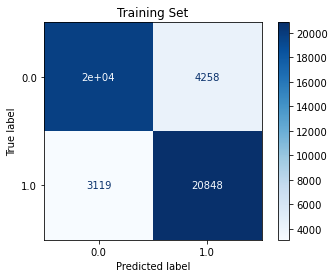

In [57]:
cm = plot_confusion_matrix(model,train_x,train_y,cmap=plt.cm.Blues)
plt.title("Training Set")

In [51]:
balanced_accuracy_score(train_y,train_results)

0.8461008887219927

In [70]:
#Testing Model With Optimum Parameters
test = pd.read_csv("test_set.csv")
test_x = test.iloc[:,0:14].values
test_y = test.iloc[:,-1].values
test_results = model.predict(test_x)

Text(0.5, 1.0, 'Testing Set')

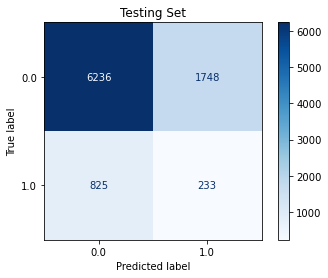

In [58]:
cm = plot_confusion_matrix(model,test_x,test_y,cmap=plt.cm.Blues)
plt.title("Testing Set")

In [71]:
balanced_accuracy_score(test_y,test_results)

0.500644483674343

In [59]:
# Full Dataset Test
full = pd.read_csv("bank_clean.csv")
full_x = full.iloc[:,0:14]
full_y = full.iloc[:,-1]

In [60]:
full_results = model.predict(full_x)

Text(0.5, 1.0, 'Full DataSet')

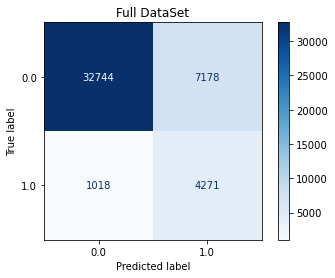

In [62]:
cm = plot_confusion_matrix(model,full_x,full_y,cmap=plt.cm.Blues)
plt.title("Full DataSet")

In [64]:
balanced_accuracy_score(full_y,full_results)

0.813862220401441

In [65]:
len(test)

9042

In [75]:
(1748)/len(test)

0.19332006193320062